In [1]:
#1. IMPORTING ALL IMPORTANT LIBRARIES
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
#2. READING THE CSV FILE INTO A PANDAS DATAFRAME
titanic_train = pd.read_csv('titanic_train.csv')

In [3]:
#3. VIEWING THE TOP FEW ROWS OF THE DATAFRAME
titanic_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
#Summary of the training data
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#4. EDA TO VISUALIZE THE DATA

Text(0.5, 1.0, 'Survived (Y or N)')

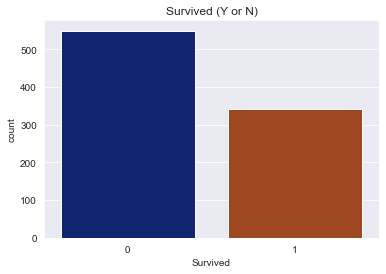

In [6]:
#4.1.1 EDA - Survival Rate Bar Graph
sns.set_style('darkgrid')
sns.countplot(x='Survived',data=titanic_train,palette='dark').set_title('Survived (Y or N)')

The following pie charts show the survival rates of passengers by their travelling class


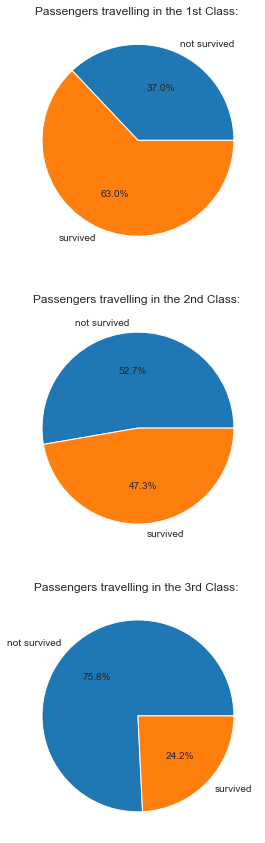

In [7]:
#4.1.2 EDA - Survival Rate Pie Chart
print("The following pie charts show the survival rates of passengers by their travelling class")
labels = ["not survived", "survived"]
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
plt.title("Passengers travelling in the 1st Class: ")
plt.pie(titanic_train[titanic_train["Pclass"] == 1].groupby(["Survived"]).size(), labels=labels, autopct='%1.1f%%')
plt.subplot(3,1,2)
plt.title("Passengers travelling in the 2nd Class: ")
plt.pie(titanic_train[titanic_train["Pclass"] == 2].groupby(["Survived"]).size(), labels=labels, autopct='%1.1f%%')
plt.subplot(3,1,3)
plt.title("Passengers travelling in the 3rd Class: ")
plt.pie(titanic_train[titanic_train["Pclass"] == 3].groupby(["Survived"]).size(), labels=labels, autopct='%1.1f%%')
plt.show()

Text(0.5, 1.0, 'Survival by Sex')

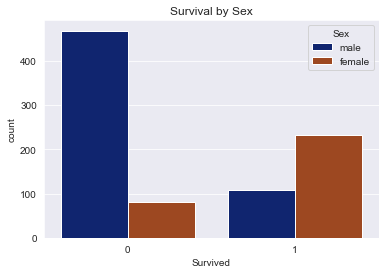

In [8]:
#4.2 EDA - Survival Rate by Gender
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Sex',data=titanic_train,palette='dark').set_title('Survival by Sex')

Text(0.5, 1.0, 'Survival by PClass')

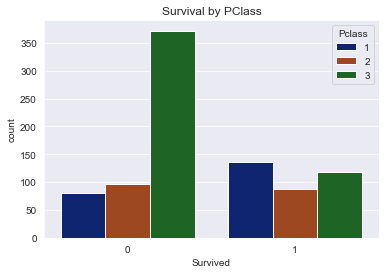

In [9]:
#4.3 EDA - Survival Rate by Passenger Class
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic_train,palette='dark').set_title('Survival by PClass')

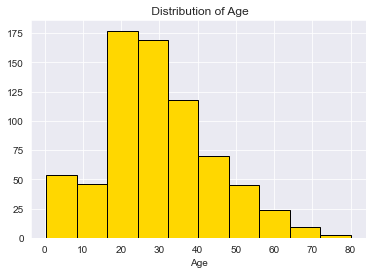

In [10]:
#4.4 EDA - Ages of Passengers
plt.hist(titanic_train['Age'],color="gold",edgecolor='k')
plt.title(" Distribution of Age")
plt.xlabel("Age")
plt.show()

Text(0.5, 1.0, 'Spouse / Sibling Count')

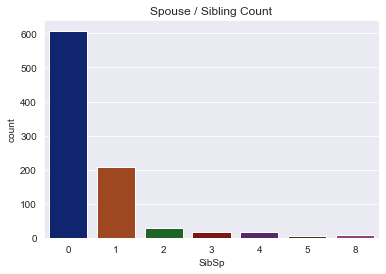

In [11]:
#4.5 EDA - Count of Siblings / Spouse
sns.set_style('darkgrid')
sns.countplot(x='SibSp',data=titanic_train,palette='dark').set_title('Spouse / Sibling Count')

<AxesSubplot:>

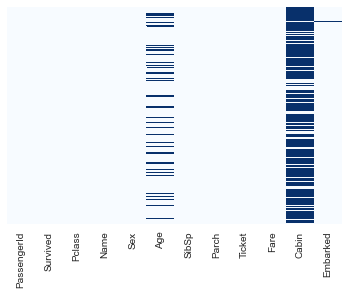

In [12]:
#5. CHECKING FOR MISSING DATA (AGE/CABIN)
sns.set_style('darkgrid')
sns.heatmap(titanic_train.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [13]:
#From the output, we can see that the columns Age and Cabin have a lot of null values, and column Embarked has very few Null values (2 null values exactly)

In [14]:
#6. DATA CLEANING - IMPUTE THE MISSING VALUES IN AGE BASED PCLASS (BY TAKING AVG IN PCLASS)
titanic_train['Age']=titanic_train['Age'].groupby([titanic_train['Pclass']]).apply(lambda x: x.fillna(x.mean()))

In [15]:
#7. DATA CLEANING - DROPPING THE CABIN COLUMN

titanic_train.drop('Cabin',axis=1,inplace=True)

#to check the DataFrame w/o the column Cabin,
#titanic_train.head()

In [16]:
#8. DATA CLEANING - DROPPING THE ROW IN EMBARKED COLUMN THAT IS NaN

In [17]:
#8.1. Checking Null values in the 'Embarked' column
titanic_train['Embarked'].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [18]:
#We have 2 null values based on the output
#8.2. Dropping the NaN values in Embarked
titanic_train.dropna(axis=0,subset=['Embarked'],inplace=True)

#to re-check the count of null values, you can run titanic_train['Embarked'].isnull().value_counts()

In [19]:
#9. CONVERTING CATEGORICAL FEATURES (SEX, EMBARK) TO DUMMY VARIABLES USING GET DUMMIES
#we are using get_dummies because if not used, the categorical data can't be used as inputs by the model
sex = pd.get_dummies(titanic_train['Sex'],drop_first=True)
embark = pd.get_dummies(titanic_train['Embarked'],drop_first=True)
titanic_train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
titanic_train=pd.concat([titanic_train,sex,embark],axis=1)
titanic_train

PassengerId  Survived  Pclass       Age  SibSp  Parch     Fare  male  Q  \
0              1         0       3  22.00000      1      0   7.2500     1  0   
1              2         1       1  38.00000      1      0  71.2833     0  0   
2              3         1       3  26.00000      0      0   7.9250     0  0   
3              4         1       1  35.00000      1      0  53.1000     0  0   
4              5         0       3  35.00000      0      0   8.0500     1  0   
..           ...       ...     ...       ...    ...    ...      ...   ... ..   
886          887         0       2  27.00000      0      0  13.0000     1  0   
887          888         1       1  19.00000      0      0  30.0000     0  0   
888          889         0       3  25.14062      1      2  23.4500     0  0   
889          890         1       1  26.00000      0      0  30.0000     1  0   
890          891         0       3  32.00000      0      0   7.7500     1  1   

     S  
0    1  
1    0  
2    1  
3    1  
4    1  
..  ..  
886  1  
887  1  
888  1  
889  0  
890  0  

[889 rows x 10 columns]

In [20]:
#10. BUILDING A LOGISTIC REGRESSION MODEL (70:30 TRAIN:TEST SPLIT)
#In the Logistic Regression model, we have an x variable and a y variable. The Y variable is Survived(binary).
#And the X variable is everything apart from Survived, hence:

In [21]:
#X Array:
titanic_train.drop('Survived',axis=1)

PassengerId  Pclass       Age  SibSp  Parch     Fare  male  Q  S
0              1       3  22.00000      1      0   7.2500     1  0  1
1              2       1  38.00000      1      0  71.2833     0  0  0
2              3       3  26.00000      0      0   7.9250     0  0  1
3              4       1  35.00000      1      0  53.1000     0  0  1
4              5       3  35.00000      0      0   8.0500     1  0  1
..           ...     ...       ...    ...    ...      ...   ... .. ..
886          887       2  27.00000      0      0  13.0000     1  0  1
887          888       1  19.00000      0      0  30.0000     0  0  1
888          889       3  25.14062      1      2  23.4500     0  0  1
889          890       1  26.00000      0      0  30.0000     1  0  0
890          891       3  32.00000      0      0   7.7500     1  1  0

[889 rows x 9 columns]

In [22]:
#And the Y variable is
titanic_train['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [23]:
#Applying Logistic Regression with a 70:30 split:
X_train, X_test, y_train, y_test = train_test_split(titanic_train.drop('Survived',axis=1),
                                                    titanic_train['Survived'], train_size=0.70)


In [24]:
logreg=LogisticRegression(solver='lbfgs',max_iter=900)

In [25]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=900)

In [26]:
yhat=logreg.predict(X_test)
yhat

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0], dtype=int64)

In [27]:
#logreg.predict_proba(X_test)

In [28]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=900)

In [29]:
#11. PREDICTION AND EVALUATION OF THE MODEL

In [30]:
logreg.coef_
#pd.DataFrame(logreg.coef_) #to see the same array in a DF format

array([[-1.26073506e-04, -9.99828077e-01, -4.27930879e-02,
        -3.64167845e-01, -1.13297197e-02,  3.88964895e-03,
        -2.53526238e+00, -1.07745248e-01, -2.63751085e-01]])

In [31]:
predictions = logreg.predict(X_test)
predictions
X_test #predicted values

PassengerId  Pclass       Age  SibSp  Parch     Fare  male  Q  S
452          453       1  30.00000      0      0  27.7500     1  0  0
416          417       2  34.00000      1      1  32.5000     0  0  1
443          444       2  28.00000      0      0  13.0000     0  0  1
626          627       2  57.00000      0      0  12.3500     1  1  0
249          250       2  54.00000      1      0  26.0000     1  0  1
..           ...     ...       ...    ...    ...      ...   ... .. ..
828          829       3  25.14062      0      0   7.7500     1  1  0
19            20       3  25.14062      0      0   7.2250     0  0  0
312          313       2  26.00000      1      1  26.0000     0  0  1
469          470       3   0.75000      2      1  19.2583     0  0  0
480          481       3   9.00000      5      2  46.9000     1  0  1

[267 rows x 9 columns]

In [32]:
#11.1 - Confusion Matrix
confusion_matrix=confusion_matrix(y_test,yhat)
confusion_matrix

array([[149,  25],
       [ 26,  67]], dtype=int64)

In [33]:
#11.2 - Classification Report
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       174
           1       0.73      0.72      0.72        93

    accuracy                           0.81       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.81      0.81      0.81       267



In [34]:
#11.3 - Accuracy Score
accuracy_score(y_test, yhat)

0.8089887640449438

In [35]:
titanic_train2=pd.read_csv('titanic_train.csv')

In [36]:
#The letter in cabin shows us the deck at which the passenger stayed. There were a total of 7 decks on the Titanic (A-G). The number of passengers on each deck is given below
titanic_train2.dropna(axis=0,subset=['Cabin'],inplace=True)
titanic_train2['Cabin']
cabin_count=[]
for i in titanic_train2['Cabin']:
    cabin_count.append(i[0])
print("The number of people with a cabin in deck A = ",cabin_count.count('A'))
print("The number of people with a cabin in deck B = ",cabin_count.count('B'))
print("The number of people with a cabin in deck C = ",cabin_count.count('C'))
print("The number of people with a cabin in deck D = ",cabin_count.count('D'))
print("The number of people with a cabin in deck E = ",cabin_count.count('E'))
print("The number of people with a cabin in deck F = ",cabin_count.count('F'))
print("The number of people with a cabin in deck G = ",cabin_count.count('G'))

The number of people with a cabin in deck A =  15
The number of people with a cabin in deck B =  47
The number of people with a cabin in deck C =  59
The number of people with a cabin in deck D =  33
The number of people with a cabin in deck E =  32
The number of people with a cabin in deck F =  13
The number of people with a cabin in deck G =  4


In [37]:
titanic_train3=pd.read_csv('titanic_train.csv')
#Extracting the title out of a passenger's name
titanic_train3['Title'] = titanic_train3['Name'].str.extract(' ([A-Za-z]+)\.')
titanic_train3['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Jonkheer      1
Capt          1
Lady          1
Mme           1
Sir           1
Don           1
Countess      1
Ms            1
Name: Title, dtype: int64

In [38]:
titanic_train3.groupby(['Title'])['Survived'].mean()

Title
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

Text(0, 0.5, 'Probabilities')

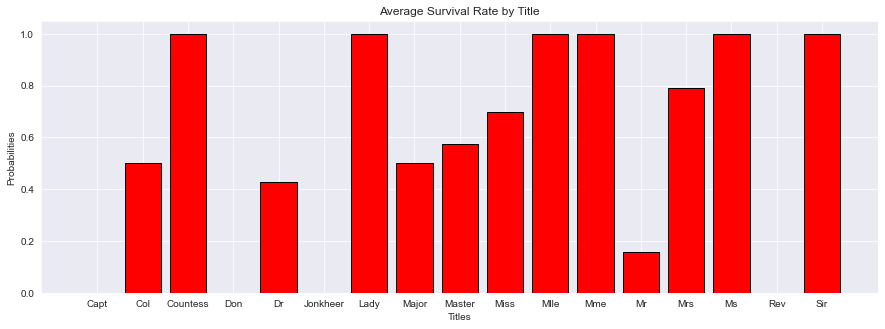

In [39]:
p_title=titanic_train3['Title'].unique()
p_title.sort()
title_sr=titanic_train3.groupby(['Title'])['Survived'].mean()
plt.figure(figsize=(15,5))
plt.bar(p_title,title_sr,color='red',edgecolor='k')
plt.title('Average Survival Rate by Title')
plt.xlabel('Titles')
plt.ylabel('Probabilities')

In [40]:
#Predicting the survival rate based on a passenger's ticket

In [41]:
titanic_train4=pd.read_csv('titanic_train.csv')

In [42]:
titanic_train4['Ticket_Len'] = titanic_train4['Ticket'].apply(lambda x: len(x))

In [43]:
titanic_train4.groupby(['Ticket_Len'])['Survived'].mean()

Ticket_Len
3     0.000000
4     0.366337
5     0.618321
6     0.319809
7     0.296296
8     0.539474
9     0.192308
10    0.341463
11    0.250000
12    0.400000
13    0.400000
15    0.333333
16    0.272727
17    0.428571
18    0.000000
Name: Survived, dtype: float64

In [44]:
titanic_train4['Ticket_Len'].value_counts()

6     419
5     131
4     101
8      76
10     41
7      27
9      26
17     14
16     11
12     10
13     10
15      9
11      8
18      6
3       2
Name: Ticket_Len, dtype: int64

Text(0.5, 1.0, 'Survivability of Passengers based on length of ticket')

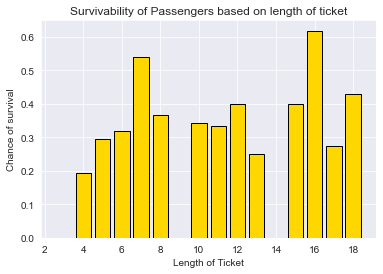

In [45]:
abc=titanic_train4['Ticket_Len'].unique()
xyz=titanic_train4.groupby(['Ticket_Len'])['Survived'].mean()
plt.bar(abc,xyz,edgecolor='k',color='gold')
plt.xlabel('Length of Ticket')
plt.ylabel('Chance of survival')
plt.title('Survivability of Passengers based on length of ticket')

In [46]:
titanic_train4['ticket_letter'] = titanic_train4['Ticket'].apply(lambda x: str(x)[0])

In [47]:
titanic_train4.groupby(['ticket_letter'])['Survived'].count()

ticket_letter
1    146
2    183
3    301
4     10
5      3
6      6
7      9
8      2
9      1
A     29
C     47
F      7
L      4
P     65
S     65
W     13
Name: Survived, dtype: int64

In [48]:
titanic_train4.groupby(['ticket_letter'])['Survived'].mean()

ticket_letter
1    0.630137
2    0.464481
3    0.239203
4    0.200000
5    0.000000
6    0.166667
7    0.111111
8    0.000000
9    1.000000
A    0.068966
C    0.340426
F    0.571429
L    0.250000
P    0.646154
S    0.323077
W    0.153846
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Survivability of Passengers based on ticket first character')

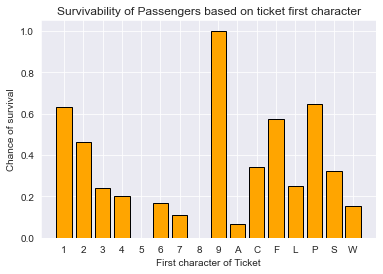

In [49]:
a=titanic_train4['ticket_letter'].unique()
a.sort()
b=titanic_train4.groupby(['ticket_letter'])['Survived'].mean()
plt.bar(a,b,color='orange',edgecolor='k')
plt.xlabel('First character of Ticket')
plt.ylabel('Chance of survival')
plt.title('Survivability of Passengers based on ticket first character')

In [50]:
#                                                         The End